In [1]:
# bert_analysis.ipynb (Jupyter Notebook format)

"""
# Analiza sentymentu za pomocą BERT (CardiffNLP)

W tym notebooku analizujemy sentyment tweetów Donalda Trumpa przy użyciu modelu BERT z Hugging Face.
"""

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils.preprocessing import combine_text, run_bert_analysis


raw_df = pd.read_csv("../data/realdonaldtrump.csv")
raw_df["full_text"] = raw_df.apply(combine_text, axis=1)

In [2]:
bert_df = run_bert_analysis(raw_df, device="mps")

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


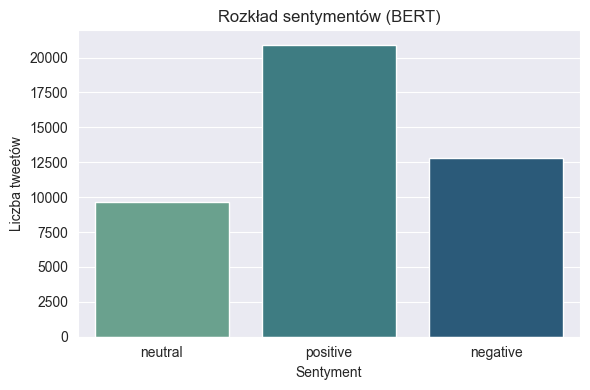

,bert_clean,bert_sentiment_label,bert_numeric,bert_probs
40463,“The Democrats are getting hit and slammed on ...,negative,2,"[0.7439263, 0.23662648, 0.019447178]"
8763,DeannaSpillyard: realdonaldtrump You are a ver...,positive,1,"[0.0053439965, 0.02413109, 0.9705249]"
10371,TroyMeaz: realDonaldTrump america is falling a...,neutral,0,"[0.32090232, 0.42019, 0.25890765]"
24526,". redstate I miss you all, and thanks for all ...",negative,2,"[0.61655194, 0.19517975, 0.18826829]"
24717,# MakeAmericaGreatAgain From my speech in Sout...,neutral,0,"[0.006396526, 0.5133748, 0.48022866]"
9242,Take a sneak peek into one of Trump Park Avenu...,neutral,0,"[0.007532708, 0.7040964, 0.2883709]"
17034,"JoeFainSr: Absolutely, Donald you made a great...",positive,1,"[0.019866189, 0.082731165, 0.8974027]"
8339,garthdahdah: TrumpGolfLA [THE] top luxury publ...,positive,1,"[0.00309411, 0.06323713, 0.9336688]"
3858,. dubephnx If we didnt remove incredibly power...,negative,2,"[0.6157741, 0.36377114, 0.020454807]"
28824,I will defeat Crooked Hillary Clinton on 11/8/...,positive,1,"[0.094375655, 0.35772237, 0.5479019]"


In [3]:
plt.figure(figsize=(6, 4))
sns.countplot(
    data=bert_df,
    x="bert_sentiment_label",
    hue="bert_sentiment_label",
    palette="crest",
    legend=False
)
plt.title("Rozkład sentymentów (BERT)")
plt.xlabel("Sentyment")
plt.ylabel("Liczba tweetów")
plt.tight_layout()
plt.show()

bert_df.sample(n = 50, random_state=42)


In [4]:
bert_df.to_csv("../data/bert_sentiment.csv", index=False)